<a href="https://colab.research.google.com/github/AngeloCarnevale/machine-learning/blob/main/Algoritmo_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGORITMO NAIVE BAYES

## Importando bibliotecas

In [39]:
import pandas as pd #vamos trazer dados de seguro!
from sklearn.model_selection import train_test_split #dividir os dados entre TREINO  e TESTE!
from sklearn.naive_bayes import GaussianNB #Dados Contínuos!
from sklearn.preprocessing import LabelEncoder #Transformação de Dados Categóricos em Informações Numéricas (dados conínos...)
from sklearn.metrics import accuracy_score #metricas estudadas anteriormente
from sklearn.metrics import precision_score #metricas estudadas anteriormente
from sklearn.metrics import recall_score #metricas estudadas anteriormente
from sklearn.metrics import f1_score #metricas estudadas anteriormente
from sklearn.metrics import classification_report #metricas estudadas anteriormente
from yellowbrick.classifier import ConfusionMatrix #para criar nossa matriz de confusão visual (gráfica)

In [40]:
base = pd.read_csv('/insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [41]:
base = base.drop(['Unnamed: 0'], axis=1)
base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [42]:
#uma tradição é usar a variável dependente como "y" as independetes como "X"
y = base.iloc[:,7].values #quero todas as linhas, no entanto somente da coluna 7! -> índice 7 tem a coluna acidente
X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values #tenho todas as colunas menos a 7

In [43]:
##TRATAMENTO DE DADOS

labelencoder = LabelEncoder()

#agora vamos percorrer as colunas para transformar elas através do label encoder
#apesar de nosso database só ter dados categóricos, será criado um código genérico
#vamos criar um laço que vai percorrer o total de colunas d objeto:
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object': #esse código só transforma objetos categóricos
    X[:,i] = labelencoder.fit_transform(X[:,i]) #transforma os dados da mesma coluna em dados numéricos

y = labelencoder.fit_transform(y)

In [48]:
#vamos separar nossos dados entre dados de treino e dados de testes!
#X independentes
#y a variável dependente
#30% de testes e 70% como treino
#random_state -> variável pra repetição de amostras! Se você quiser repetir essa mesma base de testes
#usar o mesmo random_state
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)

0.8361666666666666
Acuracia: 0.8361666666666666, Precisão: 0.8984416515911416, Recall 0.8361666666666666, F1: 0.8090758902175055
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       542
           1       0.35      0.73      0.47       505
           2       1.00      0.05      0.09       725
           3       0.98      1.00      0.99      4228

    accuracy                           0.84      6000
   macro avg       0.75      0.63      0.56      6000
weighted avg       0.90      0.84      0.81      6000



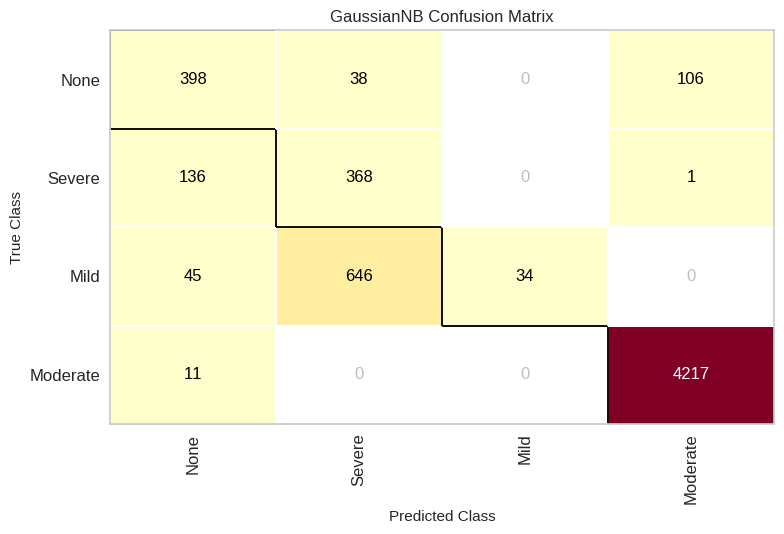

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [59]:

modelo = GaussianNB()
modelo.fit(X_treinamento,y_treinamento)

previsoes = modelo.predict(X_teste)
previsoes

accuracy = accuracy_score(y_teste, previsoes)

print(accuracy)

precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall {recall}, F1: {f1}')

report =  classification_report(y_teste, previsoes)
print(report)


#nesse caso a matriz de confusão será 4 x 4 porque temos 4 classes possíveis!
confusao = ConfusionMatrix(modelo, classes=['None','Severe','Mild','Moderate'])
confusao.fit(X_treinamento,y_treinamento)
confusao.score(X_teste,y_teste)
confusao.poof()